In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xgboost

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing ml models to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

# for imputation of bmi values
from sklearn.tree import DecisionTreeRegressor


# import ML tools
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

#1.Loading data set

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/7. Dammy/Data Analysis Project/Stroke Analysis Project/healthcare-dataset-stroke-data.csv')

##2.1.Data overview

In [ ]:
# checking the random 5 rows of our dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Features Explanation**
- 1) `id` unique identifier for each patient
- 2) `gender` Male, Female or "Other"
- 3) `age` age of the respective patient in years.
- 4) `hypertension` 0 if our patient doesn't have hypertension case, 1 if our patient has hypertension case.
- 5) `heart_disease` 0 if our patient doesn't have any heart disease case, 1 if our patient has a heart disease case.
- 6) `ever_married` No or Yes representing the marital status of patient.
- 7) `work_type` "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) `Residence_type` "Rural" or "Urban" where our respective patient lives.
- 9) `avg_glucose_level` average glucose level in blood of our patient. (mg/dl)
- 10) `bmi` body mass index
- 11) `smoking_status` "formerly smoked", "never smoked", "smokes" or "Unknown" Here the term Unknown means that this particualr information is unavailable for this patient
- 12) `stroke` 1 if our patient had a stroke or 0 if not the case.

##2.2.To check size of data

In [ ]:
# To check the number of rows and columns present in our dataframe
df.shape

(5110, 12)

##2.3.To check datatypes

In [ ]:
# getting information about the data present in our dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##2.4.To check missing values

In [ ]:
# checking for the missing values in terms of percentages
(df.isnull().sum() / len(df)) * 100


,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


##2.5.To check duplicate values





In [ ]:
# checking for the duplicate rows present in our dataframe
df.duplicated().sum()

np.int64(0)

##2.6.Checking uniques values in categorical features

In [ ]:
# Obtaining the names of object and numerical columns in lists.
obj_column = [col for col in df.columns if df[col].dtype == "object"]
num_column = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# These are all the object(string)columns present in our dataframe
df[obj_column]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
# These are all the numerical columns present in our dataframe
df[num_column]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [ ]:
# Checking the unique values in columns with object data type.
for col in obj_column:
  print(f"{col} has {df[col].nunique()} values")
  print(f"{col} has {df[col].unique()} values")

gender has 3 values
gender has ['Male' 'Female' 'Other'] values
ever_married has 2 values
ever_married has ['Yes' 'No'] values
work_type has 5 values
work_type has ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] values
Residence_type has 2 values
Residence_type has ['Urban' 'Rural'] values
smoking_status has 4 values
smoking_status has ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] values


##2.7.To check the outliers in data

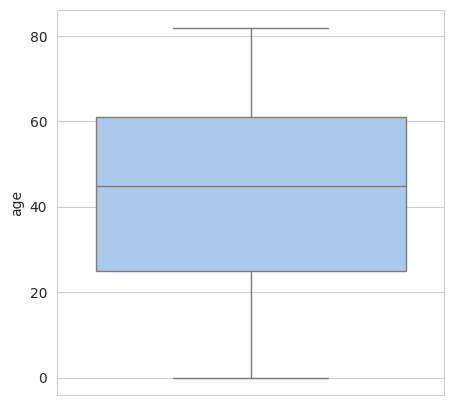

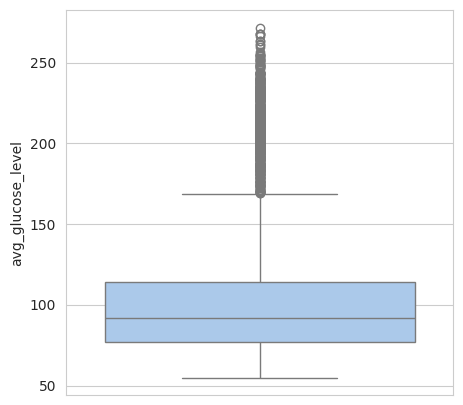

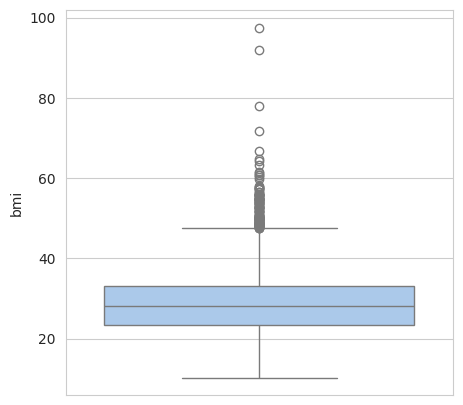

In [ ]:
#create box plot for outliers detection
cont_var = ['age', 'avg_glucose_level', 'bmi']
for col in cont_var:
  plt.figure(figsize=(5,5))
  sns.boxplot(df[col])
  plt.show()

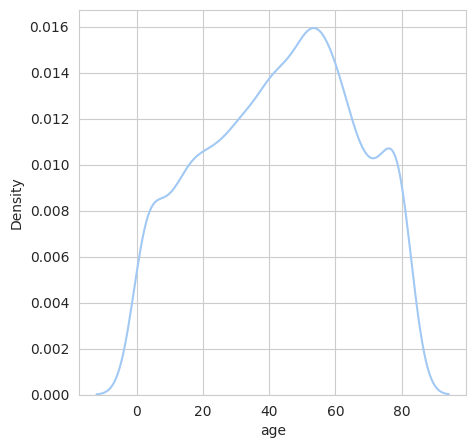

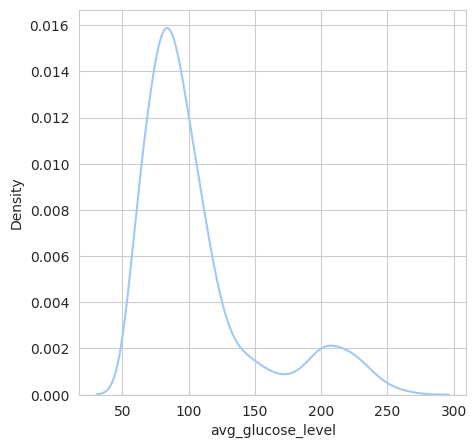

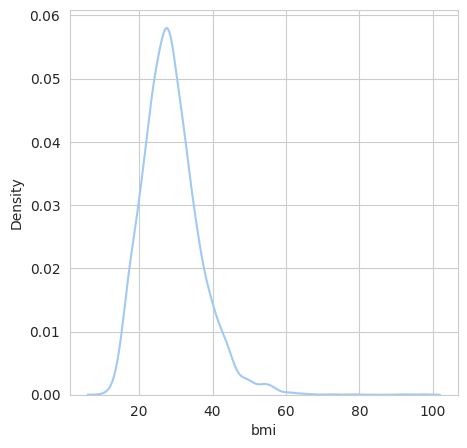

In [ ]:
#create box plot for outliers detection
cont_var = ['age', 'avg_glucose_level', 'bmi']
for col in cont_var:
  plt.figure(figsize=(5,5))
  sns.kdeplot(df[col])
  plt.show()

##2.8.To check summary statistics

In [ ]:
# getting basic summary statistics for our numerical features
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##2.9.Initial Findings from data assessing
- This dataset contains 5110 rows representing each patient information under study and 11 input features and 1 target feature named `stroke`

- All the features are important except one, the ID column. This cloumn has no effect on stroke prediction.

- The datatypes of all the features are correct except I can furthur convert the `age` datatype from float to integer. But even without changing this results remain the same. I deal with this in data cleaning step.

- Only one feature has missing values present named `bmi`. The percentage of missing value is less than 5%, exactly stands at 3.93%. So we can simply remove these rows from the data set. It will not create any impact on the insights

- No duplicate values were identified in the dataset.

- **Findings from outliers visualizations**:From boxplot and histogram I can conclude that `age` is almost normally distributed and does not contain any outlier as I can expect in the case of age.The `avg_gulucose_level` and `bmi` both features are right skewed representing a large number of outliers but in the maximum values range.I do not need to remove the outliers as they represent the significant data.It is very common to have a very large values of gulucose levels and bmi in the diabetic and obese patients as compared to the normal individuals so there is no need to remove these datapoints from the original dataframe.

- From our summary satistics study I can conclude that the `age` of our patients are widely distributed with the std of almost 23 years and average of 43 years. Our dataset have patients of almost every age ranging from children of less than 1 year to adults of 82 years.

- The `avg_glucose_level` is also widely distributed as expected with std of almost 45 mg/dl and average of 106. The minimum sugar level recorded was 55(refering to hypoglycemic case in our data) and highest was 271.74 mg/dl(the confirmed diabetic case).

      Normal Fasting Gulucose Level: 70 mg/dl to 100 mg/dl
      Normal Gulucose Level(after eating): 120 mg/dl to 140 mg/dl

- The `bmi` was also widely distributed with std of 7.85 and average of 28.89 referriing to overall obesity present in our patients in the data. The minimum bmi measured was  10.3(extremely under weight) and maximum was 97.6(extremely obese case)
      Normal bmi range: 18.5 to 24.9

- Will understand the distributions of our features visually later on in data analysis part.


#3.Data Cleaning

##3.1.Dealing with missing values

In [ ]:
# Here I perform label encoding for the categorical columns
obj_col  = [col for col in df.columns if df[col].dtype=="object"]
for col in obj_col:
  df[col] = LabelEncoder().fit_transform(df[col])


# Rows where BMI is missing
df_missing = df[df['bmi'].isnull()]
# Rows where BMI is available
df_not_missing = df[df['bmi'].notnull()]


# Define Features (X) and Target (y) for training
X_train = df_not_missing.drop(columns=['id', 'bmi'])
y_train = df_not_missing['bmi']

# Features for missing BMI rows (to predict)
X_test = df_missing.drop(columns=['id', 'bmi'])



# Initialize and train the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict missing BMI values
bmi_predicted = dt_regressor.predict(X_test)

# Fill missing values
df.loc[df['bmi'].isnull(), 'bmi'] = bmi_predicted

print("Missing values after imputation:\n", df.isnull().sum())

In [ ]:
# Removing the missing values from dataset
df.dropna(inplace=True)

df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.shape

(4909, 12)

**Reason for removing missing values**

- The reason behind the decision of removing the missing rows is that I can remove the mising rows from that if the sum of missing rows is less than 5%(3.933464) as it will not effect the credibility of our data analysis.

##3.2.Changing incorrect data types

In [ ]:
# Converting the data type of the age column from float to integer.
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   int64  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 498.6+ KB


**Reason for changing incorrect data types**

- As ages values are present in whole numbers thats why it is better to have these values in integers form rather than float.

##3.3.Removing unnecessary features

In [ ]:
# Removing the id column as it is not deemed useful.
print ('the shape before dropping column',df.shape)
df.drop('id',axis=1,inplace=True)
print ('the shape after dropping column',df.shape)

the shape before dropping column (4909, 12)
the shape after dropping column (4909, 11)




---



---



In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#4.Data analysis and visualization

##1.Univariate analysis(analysis on single variable)

- Numerical variable (box plot,histogram,kde plot)
- Categorical variables (barplot,count plot and pie plot)

##2.Bivariate analysis(analysis on two variables)

- Categorical vs Numerical (box plot, bar plot)
- Categorical Vs Categorical (Stacked bar plot, Stacked count plot)
- Numerical vs Numerical (scatter plot)

##2.Multivariate analysis(analysis on more than two variables)
- Pair plot
- Heat map
- Clustermap

##4.1.Univariate Analysis

###4.1.1.Target variable distribution

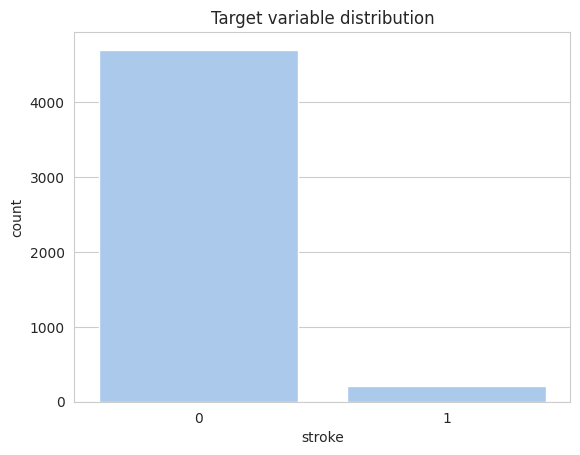

In [ ]:
sns.countplot(x=df['stroke'])
plt.title('Target variable distribution')
plt.show()

In [ ]:
# counts of each unique value in the "stroke" column of DataFrame
df['stroke'].value_counts()

,count
stroke,
0,4700
1,209


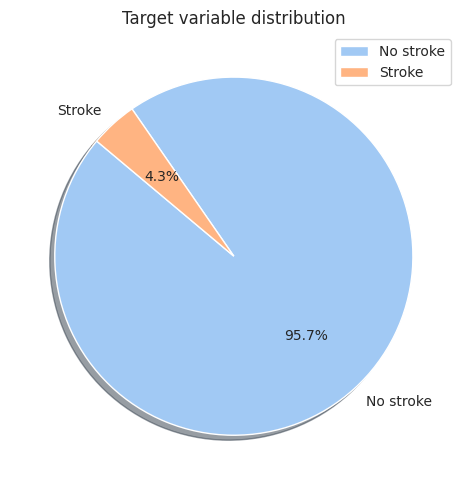

In [ ]:
# I cretae pie chart in terms of percentage to see target class imbalance
plt.figure(figsize=(5,5))
plt.pie(df['stroke'].value_counts(),labels=['No stroke','Stroke'],autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Target variable distribution')
# to add the number in pie chart
plt.legend(loc='best')
plt.tight_layout()
plt.show()

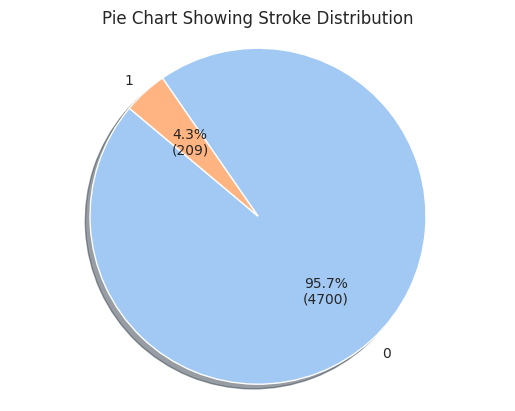

In [ ]:
all_target_values = df["stroke"].value_counts()
labels = all_target_values.index
values = all_target_values.values

# Custom autopct function to show both percentage and actual count
def custom_autopct(pct, all_vals):
    # Calculate actual number
    absolute = int(round(pct * sum(all_vals) / 100.0))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(
    values,
    labels=labels,
    autopct=lambda pct: custom_autopct(pct, values),
    shadow=True,
    startangle=140
)
plt.axis('equal')
plt.title("Pie Chart Showing Stroke Distribution")
plt.show()

###4.1.2.Input Numerical variables univariate analysis

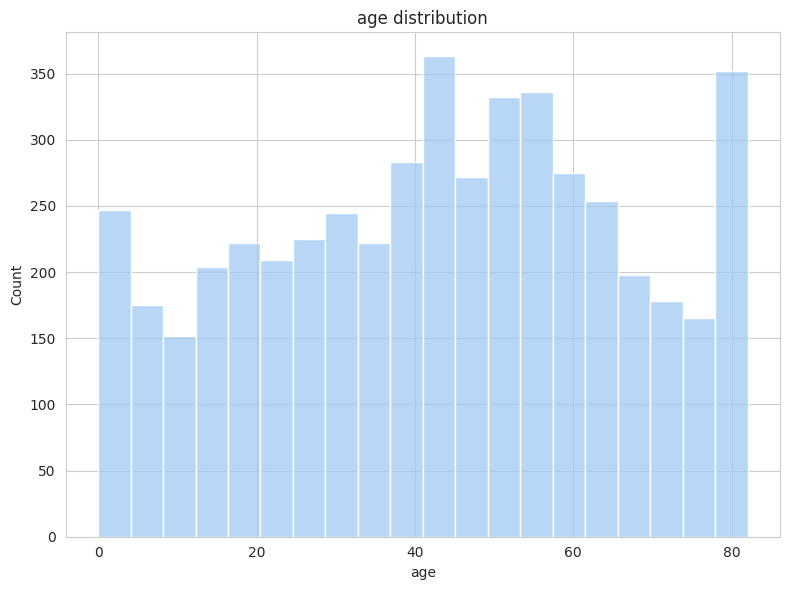

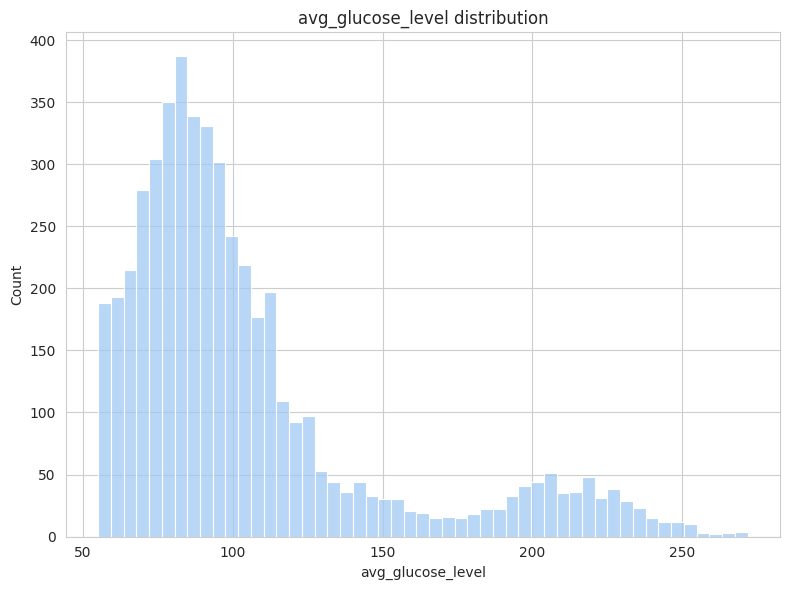

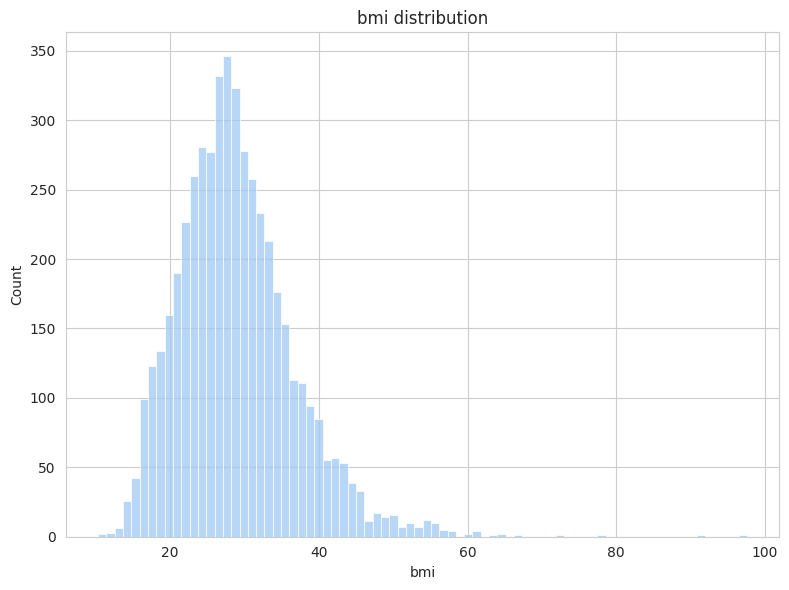

In [ ]:
#create box plot for outliers detection
cont_var = ['age', 'avg_glucose_level', 'bmi']
for col in cont_var:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col])
  plt.title(f'{col} distribution')
  plt.tight_layout()
  plt.show()

- There is no need to discuss the age,gulucose and bmi(Continous variables) as I have already discussed them in outlier section.

###4.1.3.Input categorical variable univariate analysis

In [ ]:
# sample zip function case
a = [1,2,3]
b = ['a','b','c']

In [ ]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

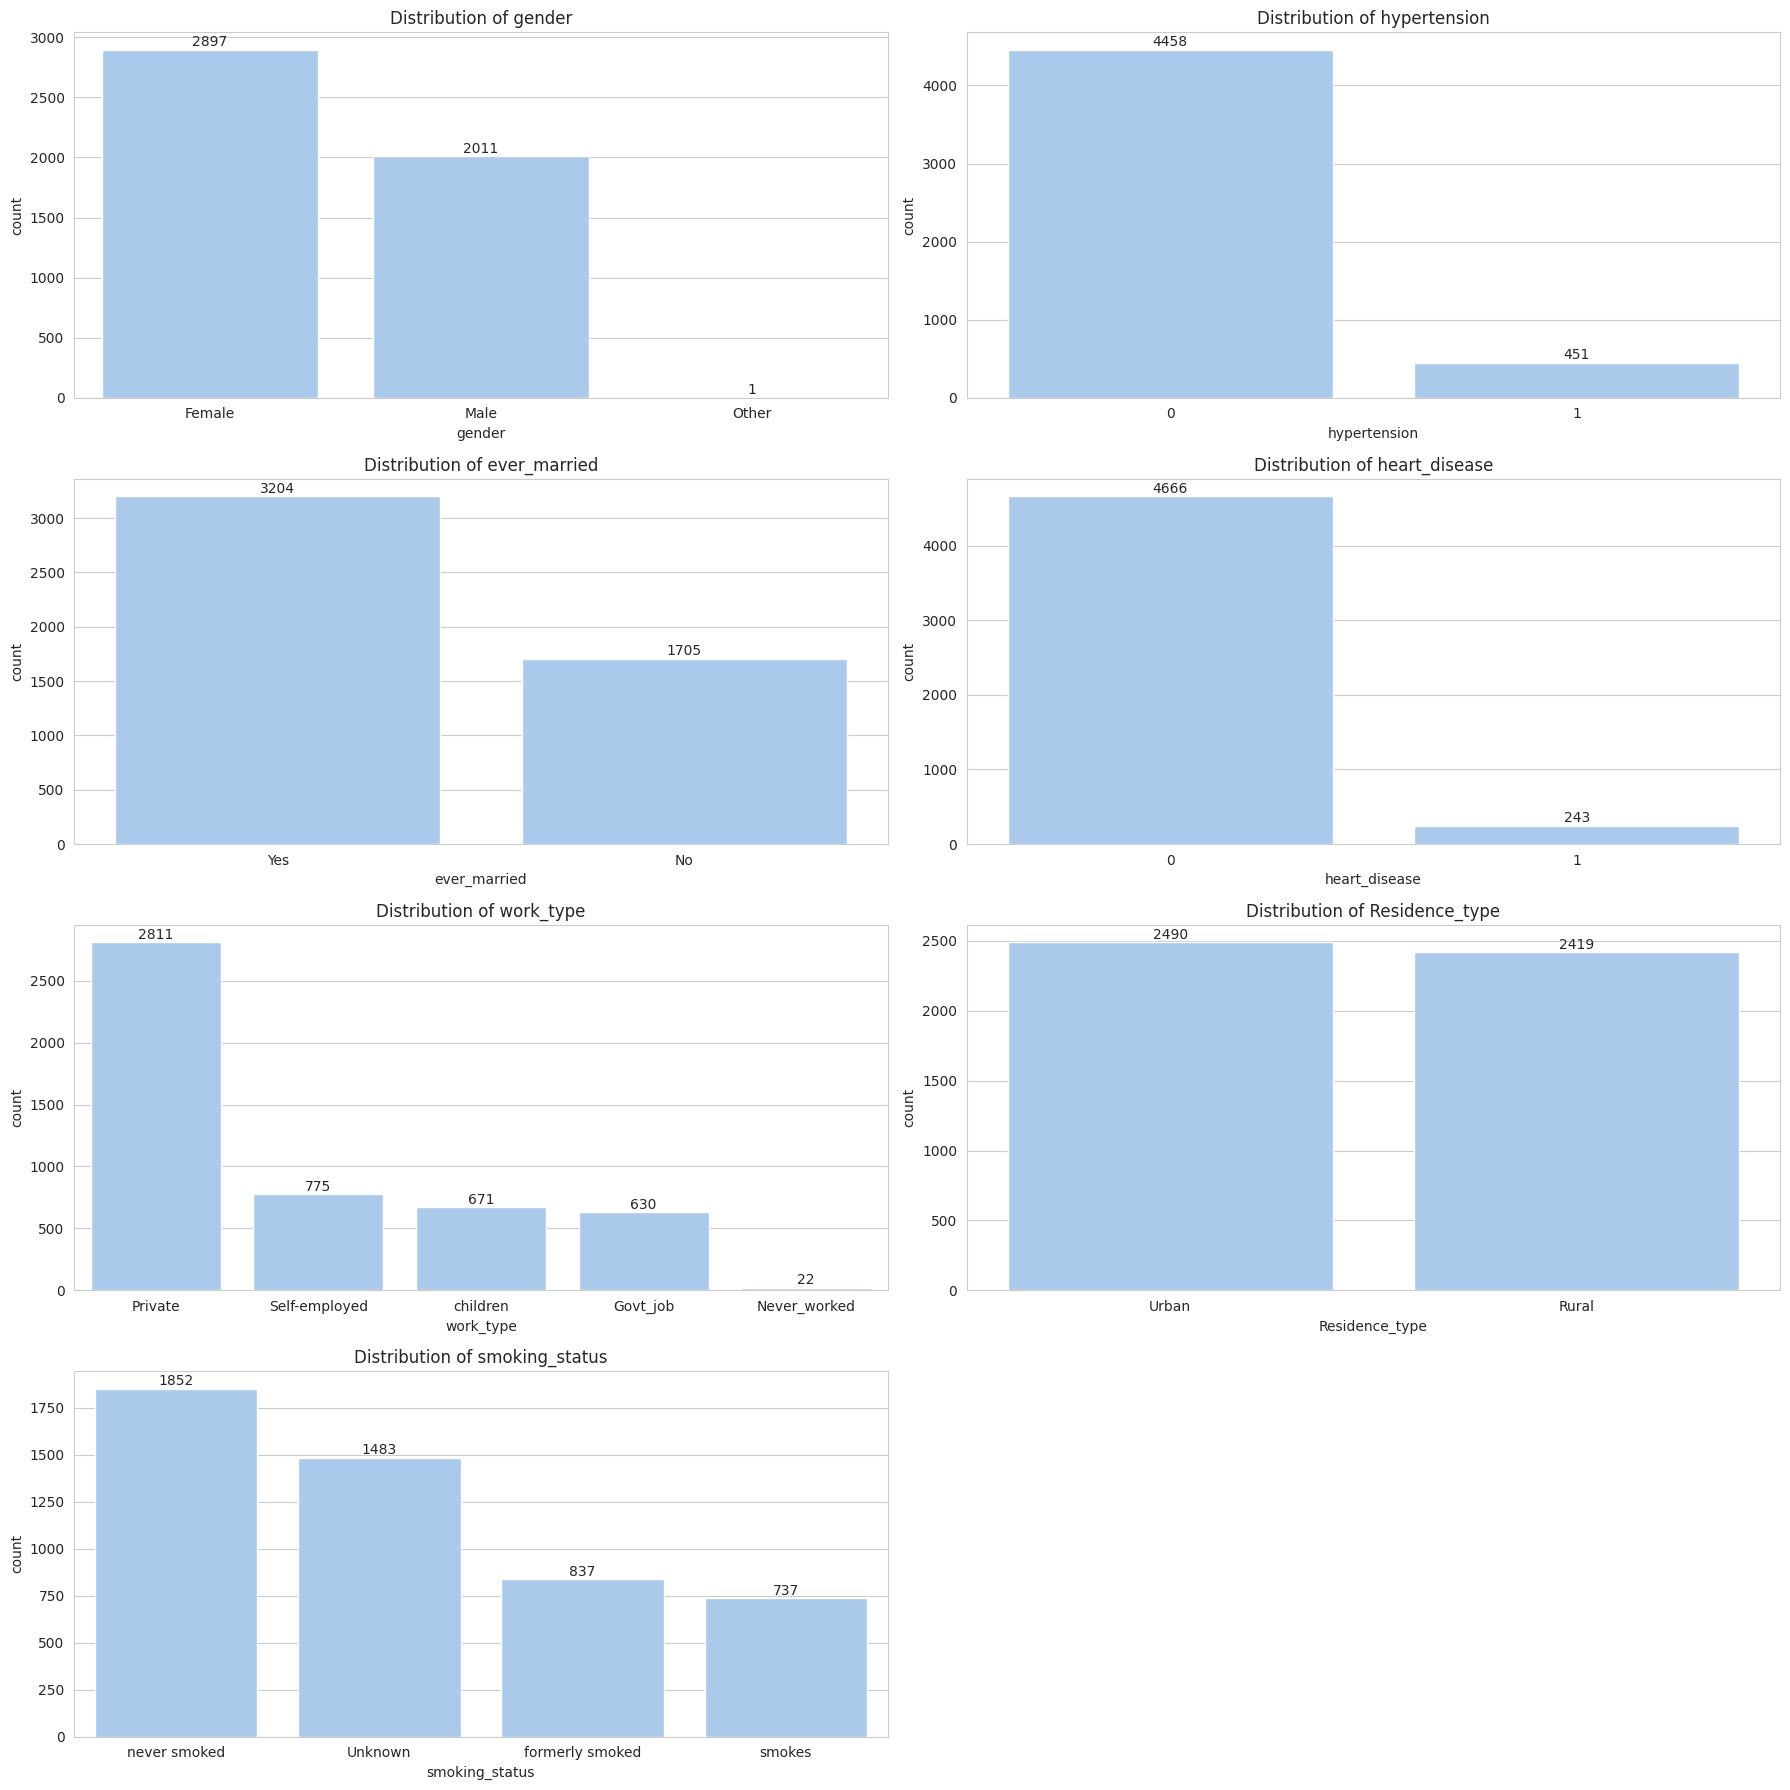

In [ ]:
# Define the categorical variables
categorical_var = ['gender', 'hypertension', 'ever_married', 'heart_disease', 'work_type', 'Residence_type', 'smoking_status']

# Set up subplots for better visualization
fig, axis = plt.subplots(4, 2, figsize=(18, 18))

# Plotting countplots for each categorical variable
for var, ax in zip(categorical_var, axis.flatten()):
    sns.countplot(x=df[var], ax=ax, order=df[var].value_counts().index)

    # Add count values on top of bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2,
                p.get_height() + 0.01 * max(df[var].value_counts().values),
                int(p.get_height()), ha='center', fontsize=10)

    ax.set_title(f'Distribution of {var}')

# Hide the empty subplot if the number of variables is odd
if len(categorical_var) % 2 != 0:
    axis[-1, -1].axis('off')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

**Findings from univatiate analysis**
- There is a clear case of class imbalance with respect to target variable.
- The Female and married are slightly more as compared to male and single.
- Most of the patients belong to the work_type of Private as compared to other work categories.
- The rural and urban population is almost balanced.
- The individuals having heart disease and hypertension is predominately present in the data as compared to counter category.
- From smoking habbits the non smokers who never smokes are present more as compared to other available categories.

##4.2.Bivariate analysis

##4.2(A) Categorical vs Categorical

###4.2.1.Gender and stroke

In [ ]:
df['stroke'].value_counts()

,count
stroke,
0,4700
1,209


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2897
Male,2011
Other,1


<Axes: xlabel='gender', ylabel='stroke'>

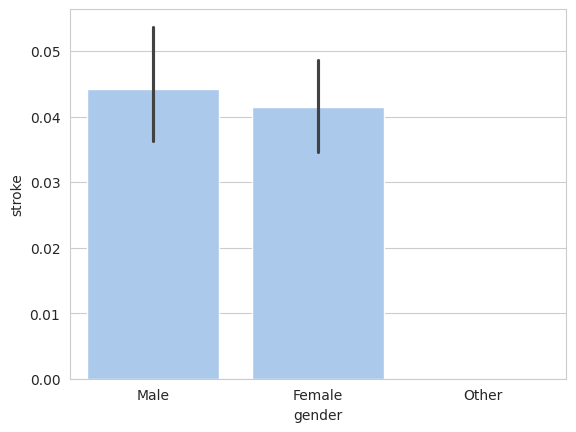

In [ ]:
sns.barplot(x=df['gender'],y=df['stroke'])

In [ ]:
# Calculate the proportion of strokes for each gender for better understanding
gender_proportion = df.groupby('gender')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions for each gender
gender_proportion

stroke,0,1
gender,,
Female,0.958578,0.041422
Male,0.955743,0.044257
Other,1.000000,NaN


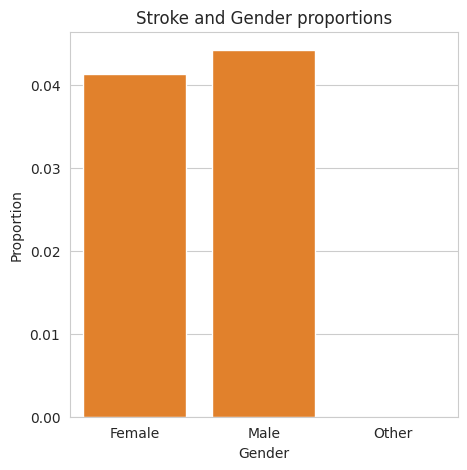

In [ ]:
# I create a bar plot for Stroke and Gender proportions
plt.figure(figsize=(5,5))
sns.barplot(x='gender',y=1,data=gender_proportion,color='#ff7f0e')
plt.title('Stroke and Gender proportions')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

###4.2.2.Hypertension vs Stroke

In [ ]:
# Calculate the proportion of strokes for each hypertension for better understanding
hypertension_proportion = df.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to hypertension
hypertension_proportion

stroke,0,1
hypertension,,
0,0.966577,0.033423
1,0.866962,0.133038


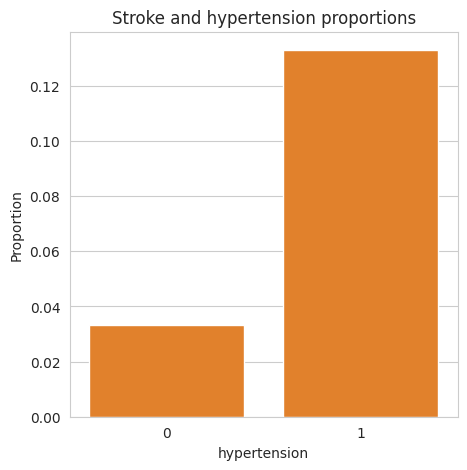

In [ ]:
# I create a bar plot for Stroke and Gender proportions
plt.figure(figsize=(5,5))
sns.barplot(x='hypertension',y=1,data=hypertension_proportion,color='#ff7f0e')
plt.title('Stroke and hypertension proportions')
plt.xlabel('hypertension')
plt.ylabel('Proportion')
plt.show()

###4.2.3.Heart disease vs Stroke

In [ ]:
# Calculate the proportion of strokes for each heart_disease for better understanding
heart_disease_proportion = df.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to heart_disease
heart_disease_proportion

stroke,0,1
heart_disease,,
0,0.963781,0.036219
1,0.835391,0.164609


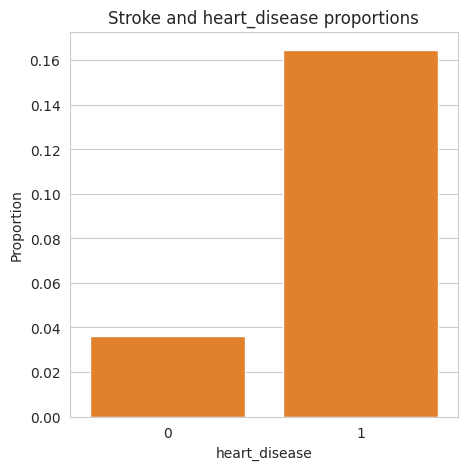

In [ ]:
# I create a bar plot for Stroke and Gender proportions
plt.figure(figsize=(5,5))
sns.barplot(x='heart_disease',y=1,data=heart_disease_proportion,color='#ff7f0e')
plt.title('Stroke and heart_disease proportions')
plt.xlabel('heart_disease')
plt.ylabel('Proportion')
plt.show()

###4.2.4.Marital status vs Stroke

In [ ]:
# Calculate the proportion of strokes for each ever_married for better understanding
ever_married_proportion = df.groupby('ever_married')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to ever_married
ever_married_proportion

stroke,0,1
ever_married,,
No,0.986510,0.013490
Yes,0.941948,0.058052


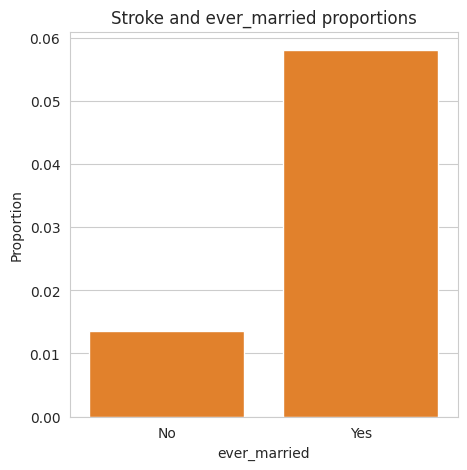

In [ ]:
# I create a bar plot for Stroke and Gender proportions
plt.figure(figsize=(5,5))
sns.barplot(x='ever_married',y=1,data=ever_married_proportion,color='#ff7f0e')
plt.title('Stroke and ever_married proportions')
plt.xlabel('ever_married')
plt.ylabel('Proportion')
plt.show()

###4.2.5.Work type vs Stroke

In [ ]:
df['work_type'].value_counts()

,count
work_type,
Private,2811
Self-employed,775
children,671
Govt_job,630
Never_worked,22


In [ ]:
# Calculate the proportion of strokes for each work_type for better understanding
work_type_proportion = df.groupby('work_type')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to work_type
work_type_proportion

stroke,0,1
work_type,,
Govt_job,0.955556,0.044444
Never_worked,1.000000,NaN
Private,0.954820,0.045180
Self-employed,0.931613,0.068387
children,0.998510,0.001490


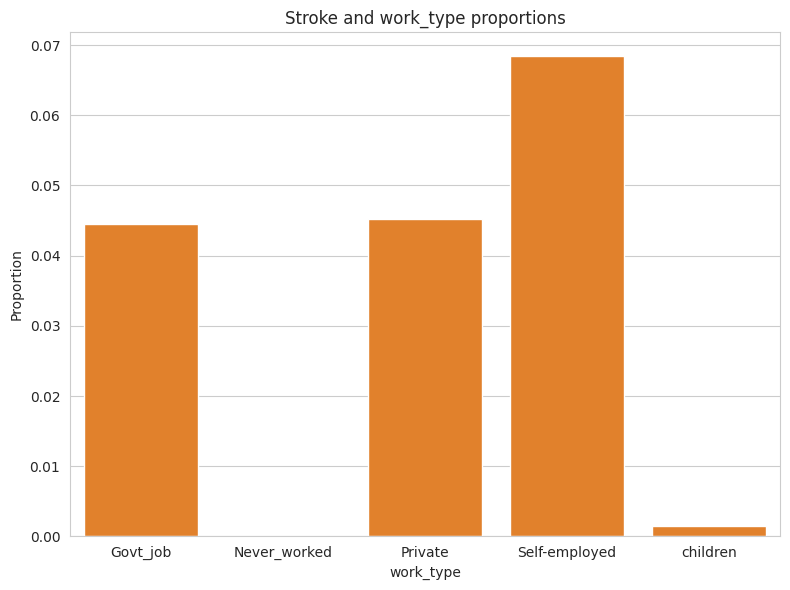

In [ ]:
# I create a bar plot for Stroke and work_type proportions
plt.figure(figsize=(8,6))
sns.barplot(x='work_type',y=1,data=work_type_proportion,color='#ff7f0e')
plt.title('Stroke and work_type proportions')
plt.xlabel('work_type')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

###4.2.6.Residence ype vs Stroke

In [ ]:
# Calculate the proportion of strokes for each Residence_type for better understanding
Residence_type_proportion = df.groupby('Residence_type')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to Residence_type
Residence_type_proportion

stroke,0,1
Residence_type,,
Rural,0.958661,0.041339
Urban,0.956225,0.043775


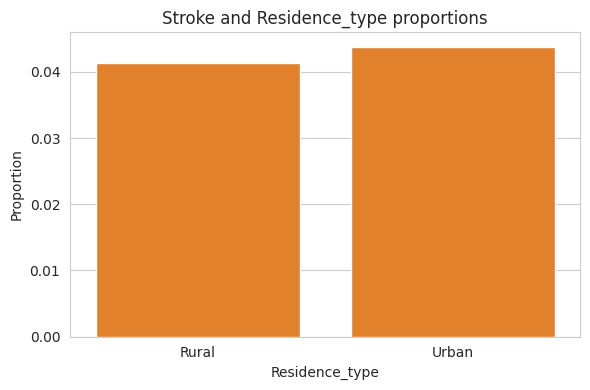

In [ ]:
# I create a bar plot for Stroke and Residence_type proportions
plt.figure(figsize=(6,4))
sns.barplot(x='Residence_type',y=1,data=Residence_type_proportion,color='#ff7f0e')
plt.title('Stroke and Residence_type proportions')
plt.xlabel('Residence_type')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

###4.2.7.Smoking vs Stroke


In [ ]:
# Calculate the proportion of strokes for each smoking_status	 for better understanding
smoking_status_proportion = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to smoking_status
smoking_status_proportion

stroke,0,1
smoking_status,,
Unknown,0.980445,0.019555
formerly smoked,0.931900,0.068100
never smoked,0.954644,0.045356
smokes,0.947083,0.052917


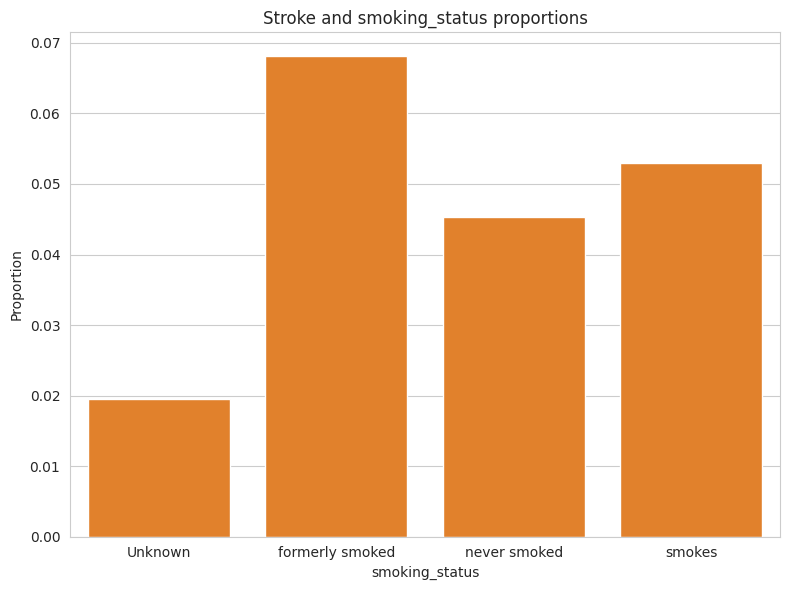

In [ ]:
# I create a bar plot for Stroke and smoking_status proportions
plt.figure(figsize=(8,6))
sns.barplot(x='smoking_status',y=1,data=smoking_status_proportion,color='#ff7f0e')
plt.title('Stroke and smoking_status proportions')
plt.xlabel('smoking_status')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

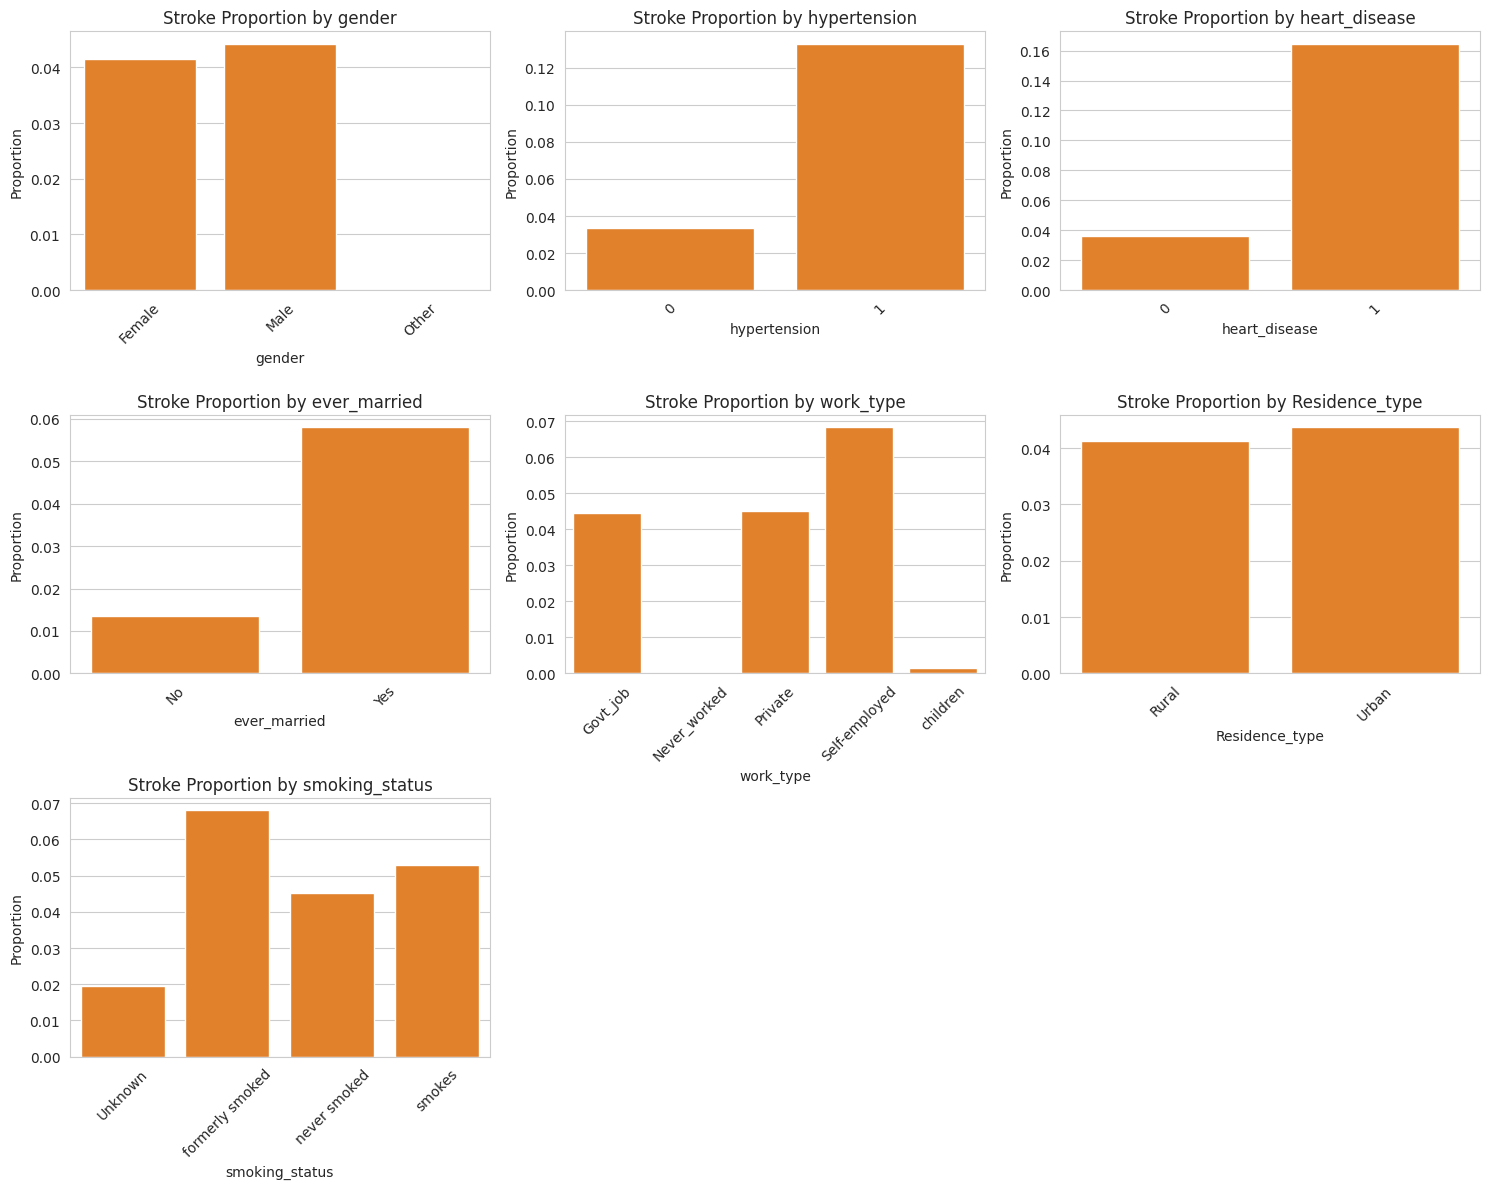

In [ ]:
# List of categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'smoking_status']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
# Flatten to easily iterate
axes = axes.flatten()

# Loop through each categorical variable
for i, var in enumerate(categorical_vars):
    # Compute stroke proportion
    stroke_proportion = df.groupby(var)['stroke'].mean()
    sns.barplot(x=stroke_proportion.index, y=stroke_proportion.values, ax=axes[i], color='#ff7f0e')
    # rotate labels at 45
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    axes[i].set_title(f'Stroke Proportion by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Proportion')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

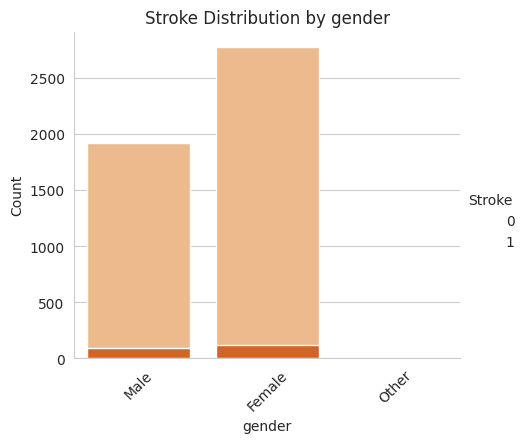

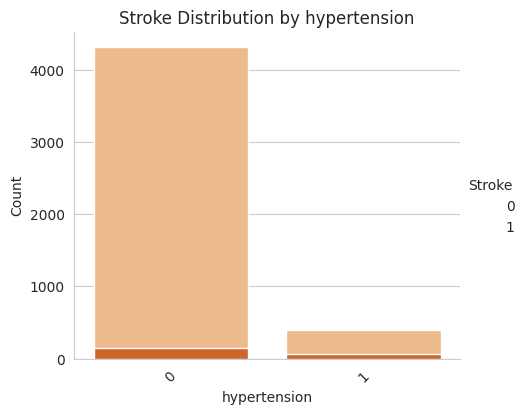

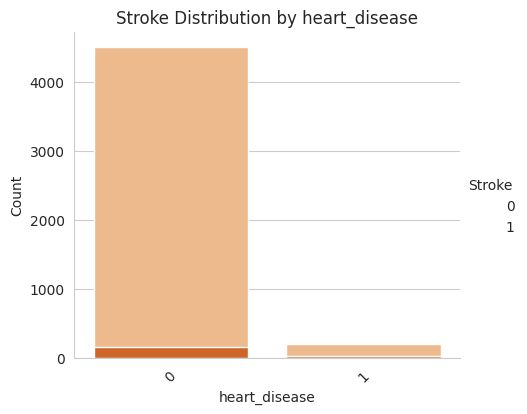

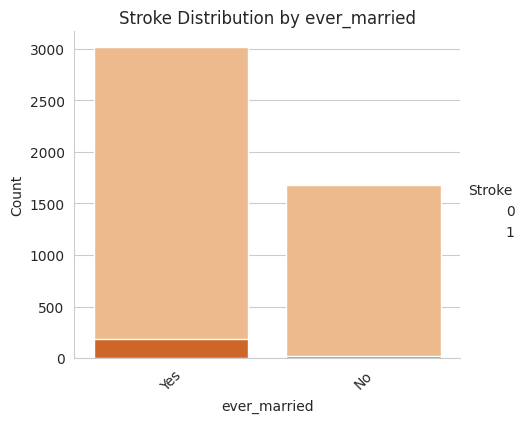

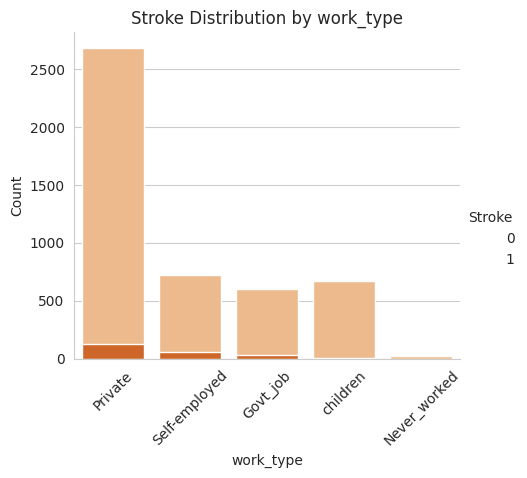

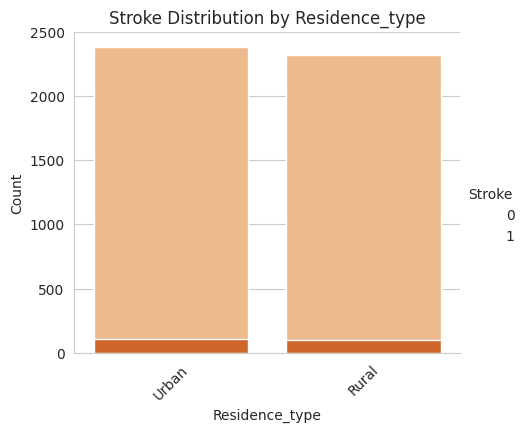

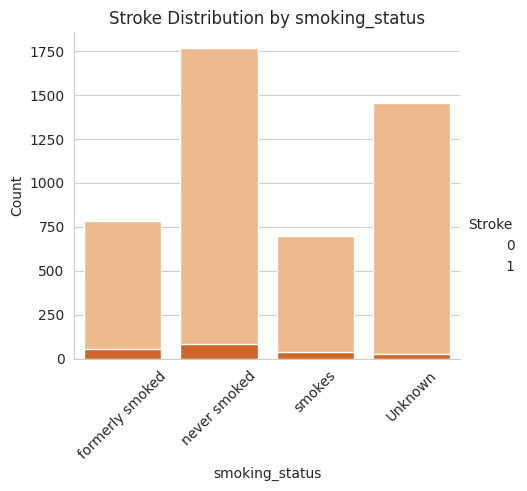

In [ ]:
# List of categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical variable and create a catplot
for var in categorical_vars:
    g = sns.catplot(
        data=df,
        x=var,
        hue='stroke',
        kind='count',
        height=4,
        aspect=1.2,
        palette='Oranges',
        # Ensure "No Stroke" (0) and "Stroke" (1) appear consistently
        hue_order=[0, 1],
        dodge=False  # Stack bars
    )

    # Adjust titles and labels
    g.set_axis_labels(var, 'Count')
    g.legend.set_title('Stroke')
    plt.title(f'Stroke Distribution by {var}')
    # rotate xlabels at 45
    plt.xticks(rotation=45)

    plt.show()

##4.2(B) Categorical vs Numerical

###4.2.8.Age vs. Stroke



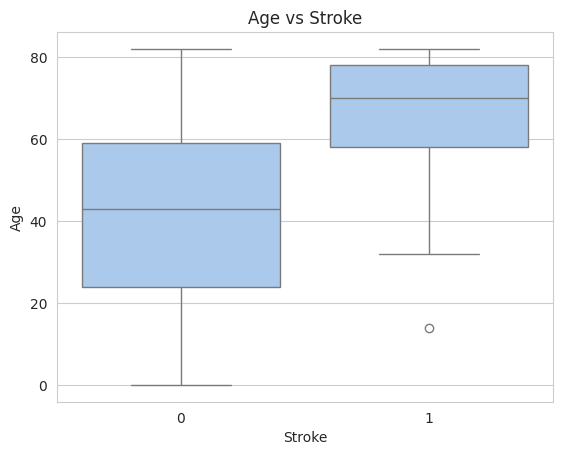

In [ ]:
# I create a box plot for Age and Stroke
sns.boxplot(x='stroke',y='age',data=df)
plt.title('Age vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

###4.2.9.Diabetes(glucose) vs Stroke



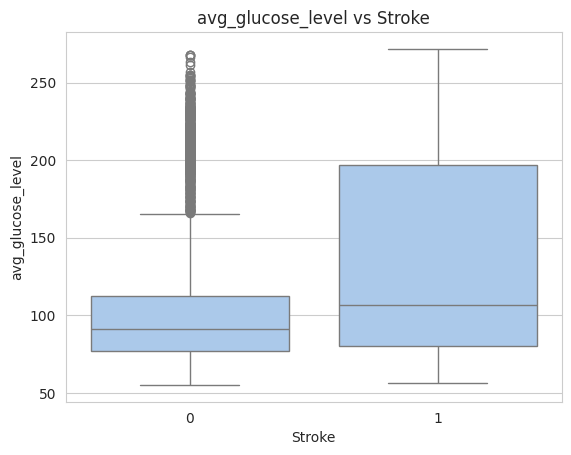

In [ ]:
# Create a box plot for avg_glucose_level and Stroke
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)
plt.title('avg_glucose_level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('avg_glucose_level')
plt.show()

###4.2.10.Obesity vs stroke



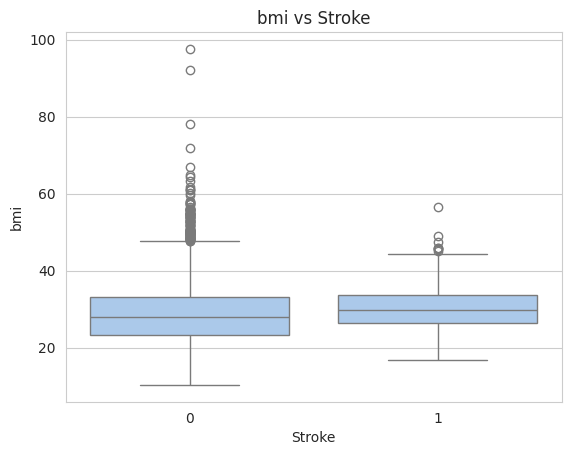

In [ ]:
# I create a box plot for bmi and Stroke
sns.boxplot(x='stroke',y='bmi',data=df)
plt.title('bmi vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('bmi')
plt.show()

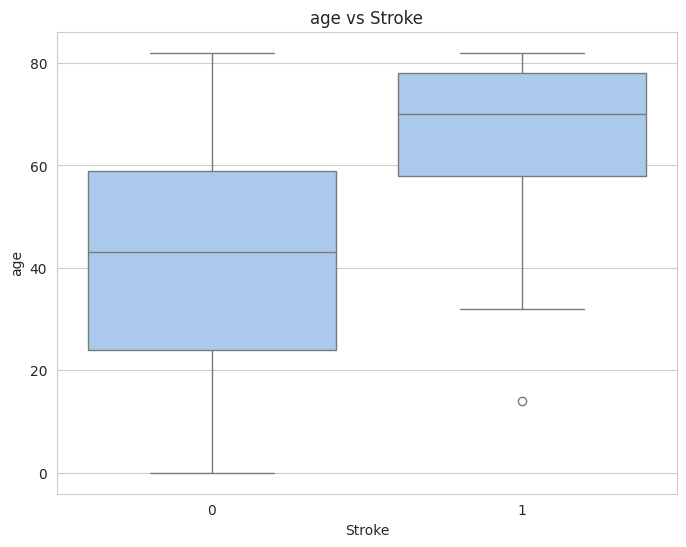

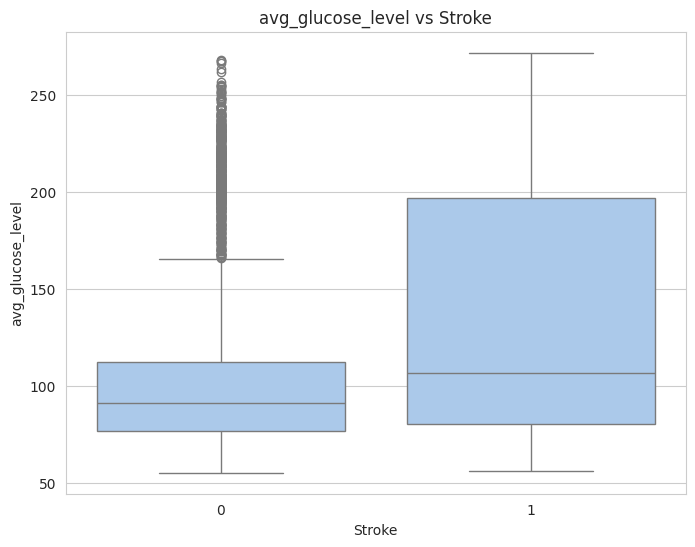

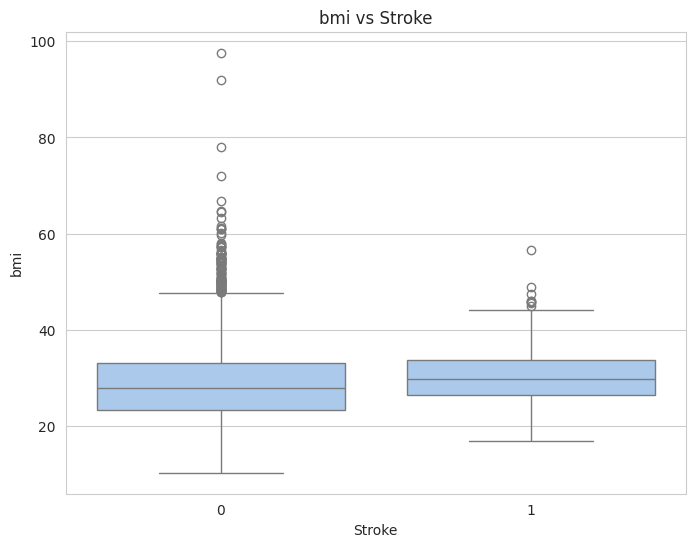

In [ ]:
# List of numerical variables to plot against 'stroke'
numerical_vars = ['age', 'avg_glucose_level', 'bmi']

# Loop through each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='stroke', y=var, data=df)
    plt.title(f'{var} vs Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(var)
    plt.show()

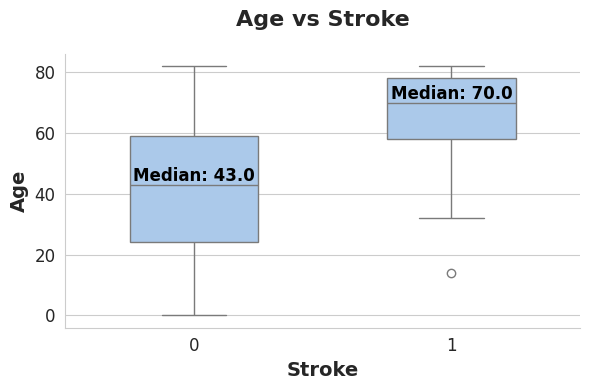

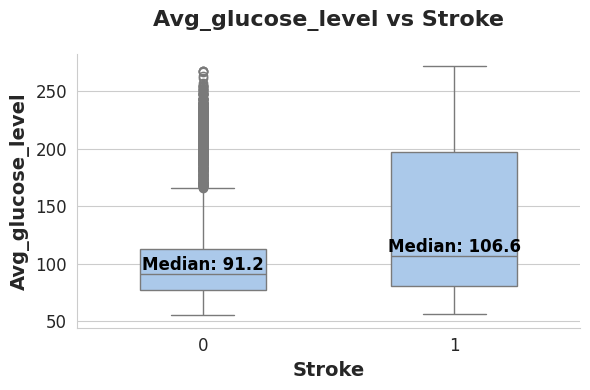

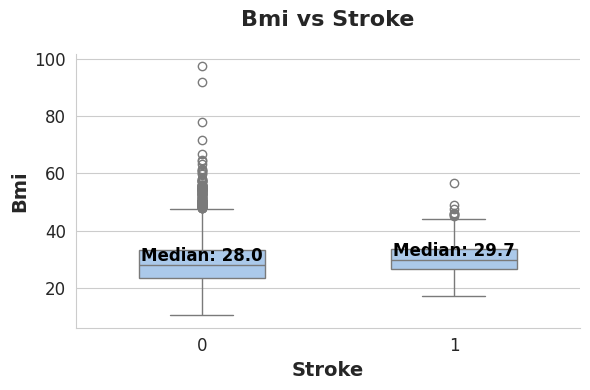

In [ ]:
# Set a professional style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# List of numerical variables to plot against 'stroke'
numerical_vars = ['age', 'avg_glucose_level', 'bmi']

# Loop through each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(6, 4))

    # Create the box plot
    ax = sns.boxplot(x='stroke', y=var, data=df, width=0.5)

    # Add title and labels with larger font sizes
    plt.title(f'{var.capitalize()} vs Stroke', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Stroke', fontsize=14, fontweight='bold')
    plt.ylabel(var.capitalize(), fontsize=14, fontweight='bold')

    # Annotate median values on the plot
    medians = df.groupby('stroke')[var].median().values
    for i, median in enumerate(medians):
        ax.text(i, median, f'Median: {median:.1f}',
                horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=12,
                color='black',
                fontweight='bold')

    # Customize tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Show the plot
    plt.tight_layout()
    plt.show()

**Findings from Bivariate analysis**
- It is visible from `gender_proportion` dataframe that male is slightly more(5.1%) at the risk of stroke as compared to female(4.7%)
- It is visible from `hypertension_proportion` dataframe that hypertensive patients are slightly more at the risk of stroke(13.2%) as compared to non hypertensive(3.9%)
- It is visible from `heart_disease_proportion` dataframe that heart_disease patients are slightly more at the risk of stroke(17%) as compared to non heart_disease patients(3%)
- It is visible from `ever_married_proportion` dataframe that married patients are slightly more at the risk of stroke(6%) as compared to non heart_disease patients(1%)
- It is visible from `work_type_proportion` dataframe that self employed individuals are slightly more at the risk of stroke(7%) as compared to other work type individuals.Other higher proportion include in governmetaljobs and private individuals(4.5%). The unsual impact is of non workers which is quite contradictorary to medical sciences evidences.
- From `Residence_type_proportion` dataframe it can be conclude that both rural and urban areas residensies have almost same impact on stroke.
- It is visible from `smoking_status_proportion` dataframe that smokers and formerly smoker patients are slightly more at the risk of stroke(6%) as compared to non smoker patients(1%).
- `age` clearly indicates that the stroke patients are mostly aged persons.
- In `avg_gulucose_level` boxplot I can see that stroke  patients have mostly high level of blood gulocose suggesting diabettes leading to stroke.
In `bmi` boxplot I can see that the inter quartile range of stroke patientsis is slightly higher suggesting obesity leads to stroke.

##4.3.Multivariate analysis using pairplot and heatmap

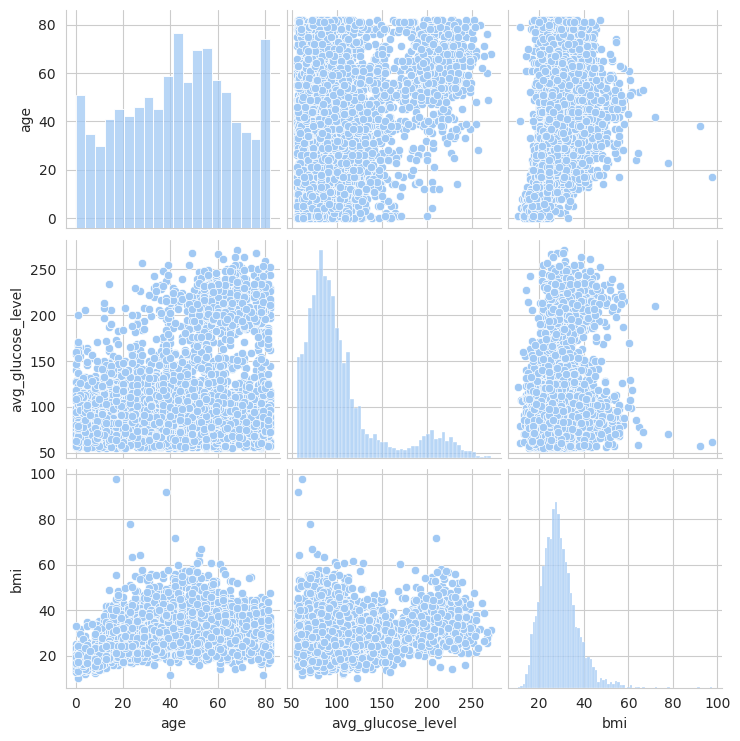

In [ ]:
# For numerical vs numerical variable analysis (in multivariate analysis)
sns.pairplot(df[numerical_vars])

In [ ]:
categorical_var

['gender',
 'hypertension',
 'ever_married',
 'heart_disease',
 'work_type',
 'Residence_type',
 'smoking_status']

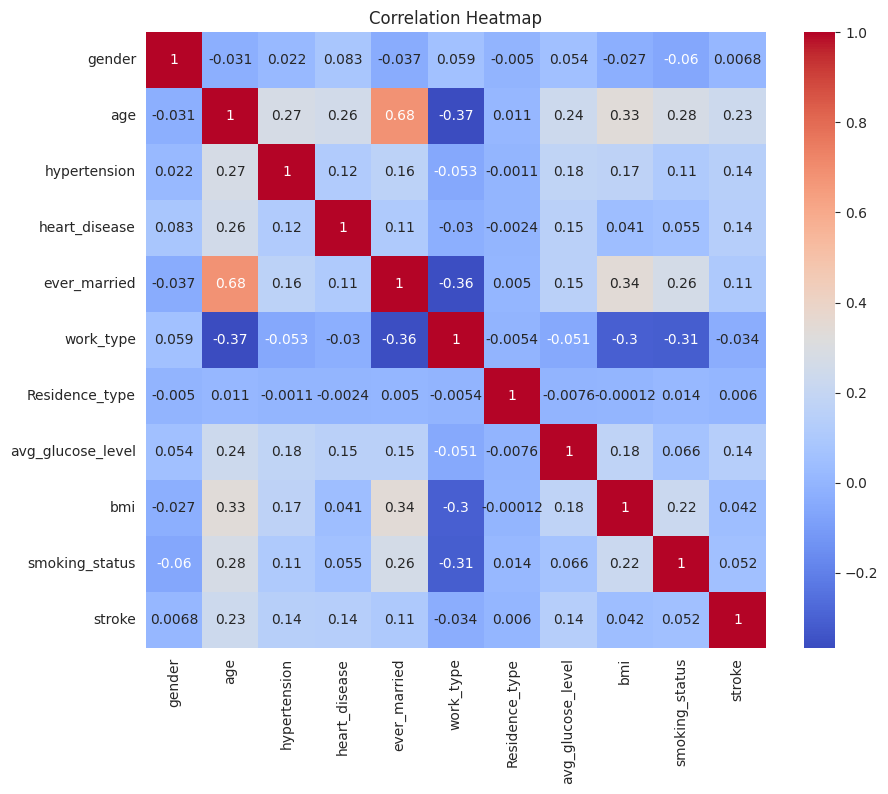

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
label_encoder = LabelEncoder()

for var in categorical_var:
    df_encoded[var] = label_encoder.fit_transform(df_encoded[var])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   int64  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 460.2 KB




---



---



#5.Data Preprocessing for Machine Learning

##5.1.Label encoding

In [ ]:
# Here I perform label encoding for the categorical columns
obj_col  = [col for col in df.columns if df[col].dtype=="object"]
for col in obj_col:
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Now all categorical columns values are in integers respectivily
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
5,1,81,0,0,1,2,1,186.21,29.0,1,1


In [ ]:
df.shape

(4909, 11)

In [ ]:
# All the features contain numerical data types as needed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   int64  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 460.2 KB


##5.2.Making features and target

In [ ]:
# separating the features and target
X = df.copy()
X.drop("stroke",axis=1,inplace=True)
y = df[["stroke"]]

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,228.69,36.6,1
2,1,80,0,1,1,2,0,105.92,32.5,2
3,0,49,0,0,1,2,1,171.23,34.4,3
4,0,79,1,0,1,3,0,174.12,24.0,2
5,1,81,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13,0,0,0,4,0,103.08,18.6,0
5106,0,81,0,0,1,3,1,125.20,40.0,2
5107,0,35,0,0,1,3,0,82.99,30.6,2
5108,1,51,0,0,1,2,0,166.29,25.6,1


In [ ]:
y

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


##5.3.splitting data into training and test set

In [ ]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
# To verify the sape of respective splitted dataframes(Train and test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3436, 10)
(3436, 1)
(1473, 10)
(1473, 1)


##5.4.Scaling

In [ ]:
# Scaling the features separately for training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 1.19869906, -1.33134049, -0.32650001, ...,  0.41613297,
        -1.08456283, -1.28404425],
       [-0.83423775, -0.40524192, -0.32650001, ..., -0.75422693,
         0.51733364,  0.58385416],
       [-0.83423775, -1.86053967, -0.32650001, ..., -0.17489763,
        -1.30069171, -1.28404425],
       ...,
       [-0.83423775, -0.84624124, -0.32650001, ..., -0.07509239,
        -0.11833956,  0.58385416],
       [ 1.19869906, -0.0965424 , -0.32650001, ...,  0.10249212,
        -0.61416466,  0.58385416],
       [-0.83423775,  0.12395726, -0.32650001, ...,  0.53934083,
         0.21221051,  0.58385416]])

In [ ]:
X_train

array([[-0.83423775,  1.13825569, -0.32650001, ..., -0.1046898 ,
        -1.42782635, -0.35009504],
       [ 1.19869906,  1.62335494, -0.32650001, ...,  0.36359182,
         0.23763744,  0.58385416],
       [-0.83423775, -1.24314062, -0.32650001, ...,  1.98800823,
        -0.86843394,  0.58385416],
       ...,
       [-0.83423775,  0.25625705, -0.32650001, ...,  3.75169311,
         0.05964894, -0.35009504],
       [-0.83423775,  0.56495658, -0.32650001, ...,  1.85677007,
         1.47084345, -0.35009504],
       [ 1.19869906,  1.18235562, -0.32650001, ..., -0.51974196,
        -0.20733381,  0.58385416]])

##5.5.Handling imbalanced data using SMOTE

- Due to the target variable's imbalance only 4.3% of cases are labelled as 1. Conventional machine learning methods may show bias in favor of the majority class. The Synthetic Minority Over-Sampling Technique (SMOTE) was used to correct for this imbalance. By oversampling the minority class, this method produced a training set distribution of both groups that was more evenly distributed.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and Resample
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution before & after
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train))


Before SMOTE: Counter({'stroke': 1})
After SMOTE: Counter({'stroke': 1})


In [ ]:
y_train.value_counts()

,count
stroke,
0,3290
1,3290


In [ ]:
# To verify the sape of respective splitted dataframes(Train and test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6580, 10)
(6580, 1)
(1473, 10)
(1473, 1)


In [ ]:
y_train.value_counts()

,count
stroke,
0,3290
1,3290


#6.Machine learning models evaluation

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Applying cross validation of 5 folds with all the models with default parameters
knn = KNeighborsClassifier(n_neighbors=2)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lgc = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
sgc = SGDClassifier()
bc = BaggingClassifier()
models = [knn, dtc, rfc, lgc, svc, xgb, abc, gbc, sgc, bc]
model_names = ["KNearestNeighbor", "Decision Tree", "Random Forest", "Logistic Regression", "Support Vector",
               "XGBClassifier", "Ada Boost", "Gradient Boosting", "Stochastic Gradient", "BaggingClassifier"]
mean_score = []

for model, name in zip(models, model_names):


    cross_score = cross_val_score(model, X_train, y_train, cv=5)


    print("Cross validation scores for {} model are {}".format(name, cross_score))
    average_score = np.mean(cross_score)
    mean_score.append(average_score)
    print("Mean cross validation score for {} model is {}".format(name, average_score))
    print("-" * 100)

Cross validation scores for KNearestNeighbor model are [0.943769   0.9399696  0.9399696  0.95364742 0.94528875]
Mean cross validation score for KNearestNeighbor model is 0.9445288753799392
----------------------------------------------------------------------------------------------------
Cross validation scores for Decision Tree model are [0.88677812 0.93237082 0.93465046 0.92781155 0.91717325]
Mean cross validation score for Decision Tree model is 0.919756838905775
----------------------------------------------------------------------------------------------------
Cross validation scores for Random Forest model are [0.92857143 0.96808511 0.96808511 0.97264438 0.96656535]
Mean cross validation score for Random Forest model is 0.960790273556231
----------------------------------------------------------------------------------------------------
Cross validation scores for Logistic Regression model are [0.78571429 0.82978723 0.79787234 0.80699088 0.79559271]
Mean cross validation score f

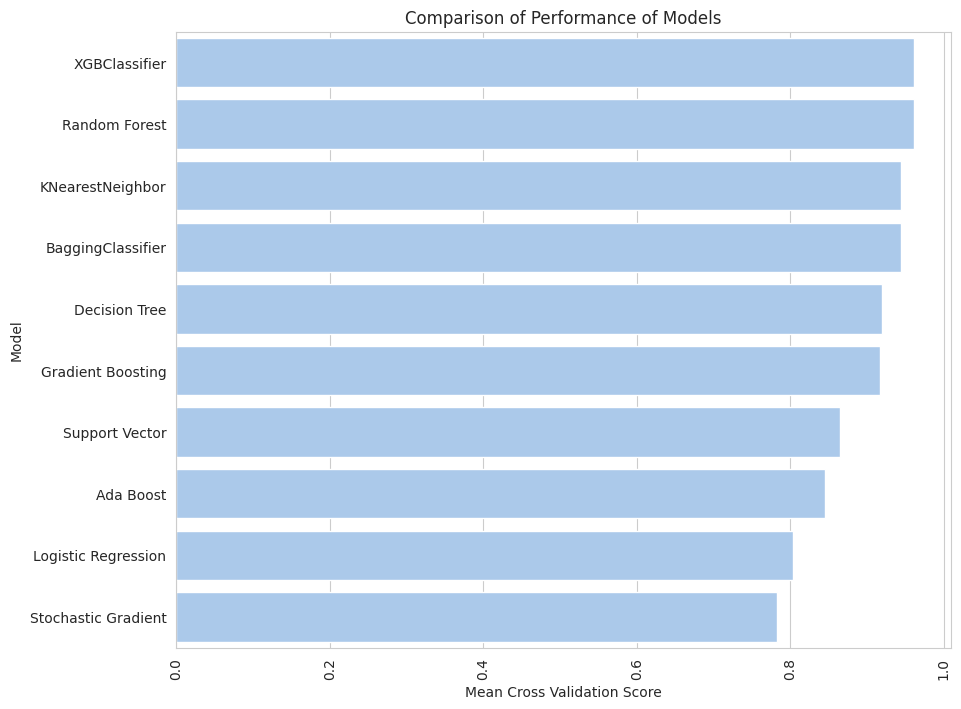

In [ ]:
# plotting bar chart to compare the model performances and pointing out the best one
plt.figure(figsize=(10, 8))
sns.barplot(y=model_names, x=mean_score, order=np.array(model_names)[np.argsort(mean_score)[::-1]])
plt.title("Comparison of Performance of Models")
plt.xlabel("Mean Cross Validation Score")
plt.ylabel("Model")
plt.xticks(rotation=90)
plt.show()

#7.Best Selected Model

- The best model is the **XGBoost Model**, let's performits hyperparameter tuning using Randomized search CV and then evaluate it's performance on the testing set.

##7.1.Hyperparameters tuning using Randomized search cv

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Display the best parameters and the corresponding accuracy score
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy Score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Accuracy Score:  0.956838905775076


- The Accuracy score after performing hyperparameters tuning using Randomized search CV is slightly better than our default XGBoost model. So I select this hypertuned model for our final testing on test dataset.

##7.2.Testing final selected model on test set (XGBoost) using best hyperparameters

In [ ]:
# initiating the model
xgb = XGBClassifier(random_state=21, subsample=0.8, n_estimators = 100, min_child_weight = 3, max_depth = 7, learning_rate = 0.2, colsample_bytree = 0.9)

# fitting the model
xgb.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_xgb = xgb.predict(X_test)

# computing the accuracy score
score_xgb = metrics.accuracy_score(y_test,y_pred_xgb)

print("Accuracy Score of XGBoost on the testing set is {}".format(score_xgb))

Accuracy Score of XGBoost on the testing set is 0.9321113374066531


In [ ]:
# computing classification report
report_xgb = metrics.classification_report(y_test,y_pred_xgb)
print("Classification Report of XGBoost")
print(report_xgb)

Classification Report of XGBoost
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1410
           1       0.09      0.06      0.07        63

    accuracy                           0.93      1473
   macro avg       0.52      0.52      0.52      1473
weighted avg       0.92      0.93      0.93      1473



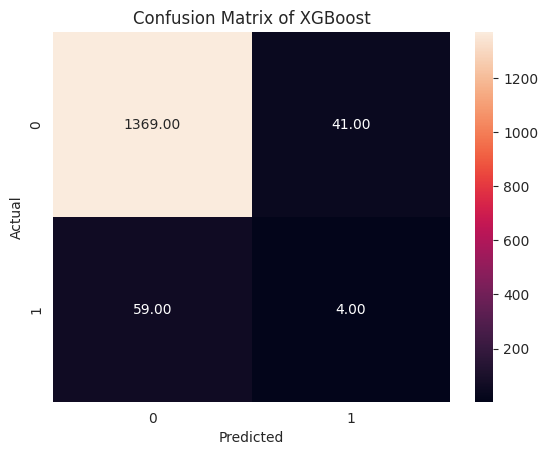

In [ ]:
# computing confuion matrix
matrix_xgb = metrics.confusion_matrix(y_test,y_pred_xgb)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_xgb,annot=True,fmt=".2f")
plt.title("Confusion Matrix of XGBoost")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()